# Исследование закономерностей, определяющих успешность продаж игр


В моем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У меня данные до 2016 года и мне нужно планировать рекламную кампанию на 2017-й. 

Мне необходимо определить период, на основе которого можно будет сделать прогноз. На этом периоде выяснить:

1) Какие платформы самые популярные?

2) Как влияют на продажи игр по платформам отзывы пользователей и критиков?

3) Какие жанры самые популярные?

4) На какой рейтинг ESRB стоит сделать акцент?

5) На какой регион стоит сделать акцент?

6) А также проверить две гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

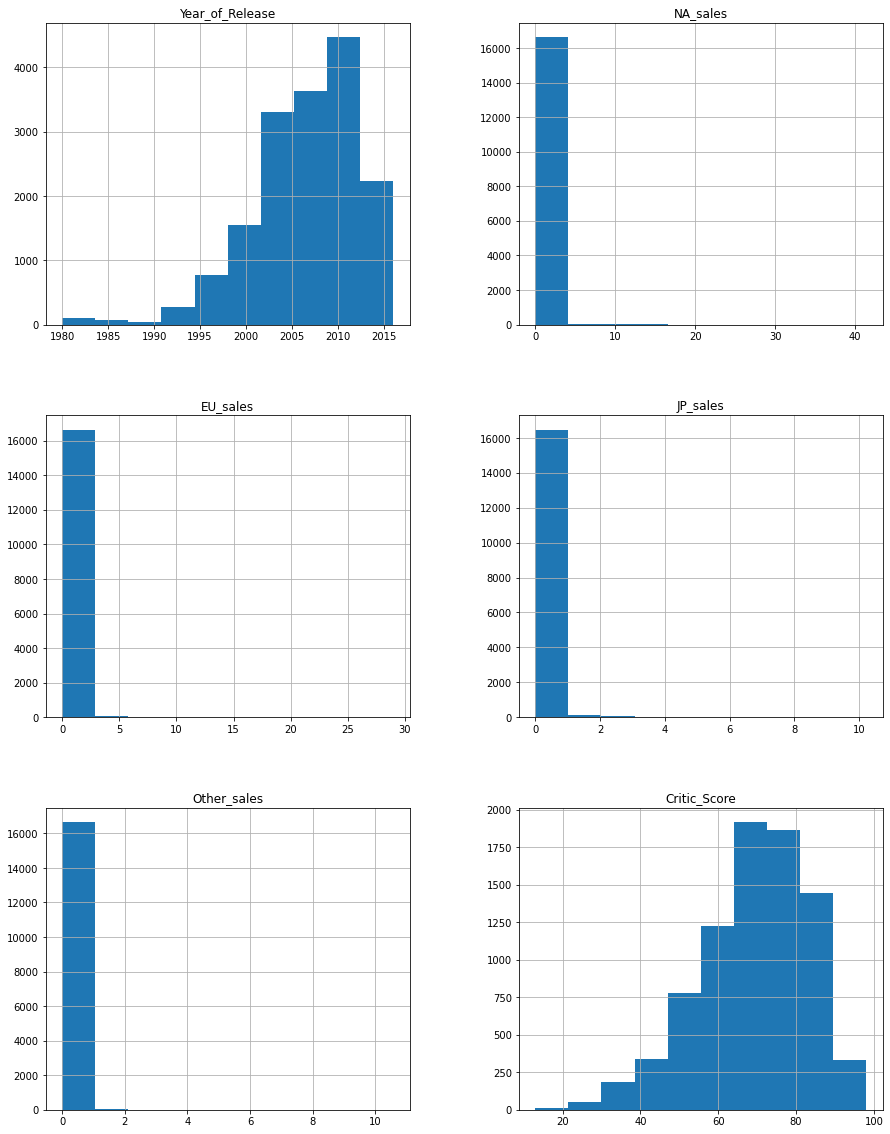

In [5]:
data.hist(figsize=(15, 20))

По гистограммам можно сделать вывод, что присутствуют аномальные значения по продажам в регионах, это обуславливается тем, что в разных регионах могут быть определенные популярные или экслюзивные игры.

### Предобработка данных

In [6]:
data.columns = data.columns.str.lower()

In [7]:
#data['critic_score'] = data['critic_score'].astype('Int64')

С таким типом данных нельзя посчитать корреляцию.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Менял тип данных в годах, потому что должны быть целые (сменил тип чуть ниже после удаления пропусков). Также в оценках пользователей было значение "tbd" - оно означает, что оценки только будут поставлены, из чего я сделал вывод, что можно заменить пропусками.

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.reset_index(drop=True)

Решил удалить строки с пропущенными значениями в столбцах name и year_of_release, потому что их очень мало (1,6%).

Оценки критиков и оценки игроков заполнять нельзя, так как это все зависит от игр. Я думал, что можно было бы заполнить медианой по жанрам, но не стал. Удалять тоже не стал, потому что слишком большой объем данных уйдет.
Рейтинг я так же не стал заполнять, хотя думал это сделать по жанрам.

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пока думал над рейтингом наткнулся на википедию и обнаружил, что рейтинг "Е" раньше назывался "К-А" и решил переименовать.

In [15]:
data.loc[data['rating']=='K-A', 'rating'] = 'E'

In [16]:
data['rating'] = data['rating'].fillna('unknown')

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Причиной пропусков может быть то, что забыли внести данные об этих играх.

In [18]:
data['sum_of_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [20]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales


In [21]:
data = data.drop_duplicates()

In [22]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_of_sales     16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Исследовательский анализ

Посмотрим, сколько игр выпускалось в разные годы.

In [23]:
game_of_years = data.groupby(by='year_of_release')['name'].count()
game_of_years

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 0, 'Год')

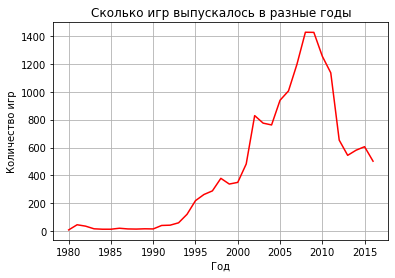

In [24]:
game_of_years.plot(grid=True, color="red")
plt.title('Cколько игр выпускалось в разные годы')
plt.ylabel('Количество игр')
plt.xlabel('Год')

Я считаю, что для прогноза нужно взять данные, начиная с 2008 года, когда был пик по количеству. Потому что в последующие года компании начали снижать выпуск игр, потому что необходимо было повышать качество игр, а не их количество.

Посмотрим, как менялись продажи по платформам.

In [25]:
sales_of_platform = data.pivot_table(index='year_of_release', columns='platform', values='sum_of_sales', aggfunc='sum')
sales_of_platform = sales_of_platform.query('year_of_release >= 1995')

Text(0, 0.5, 'Количество игр')

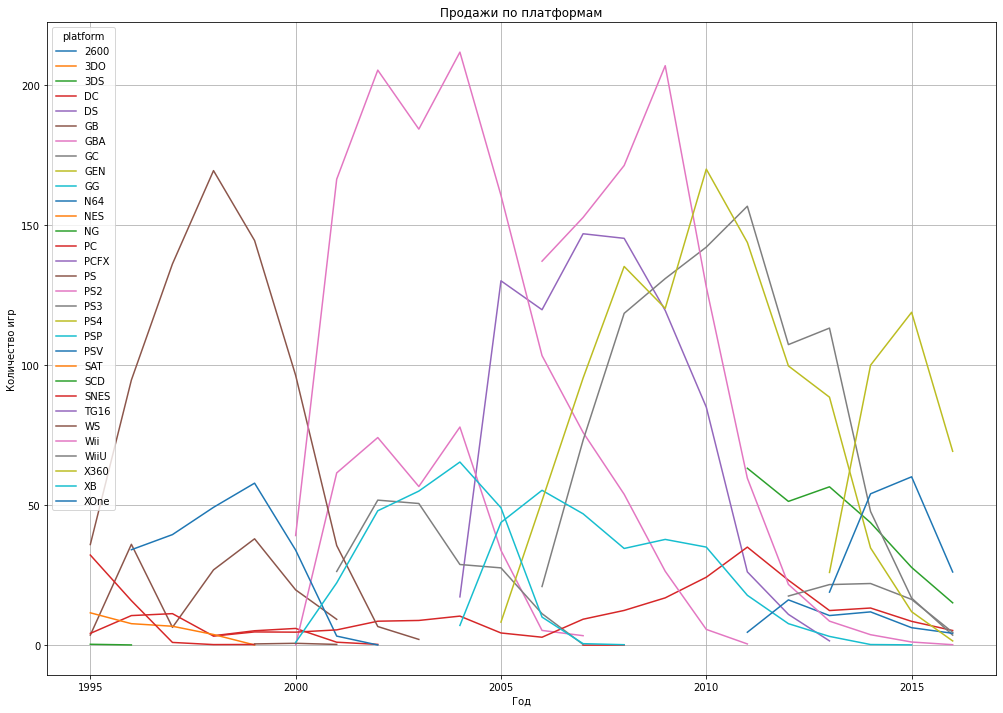

In [26]:
sales_of_platform.plot(title='Продажи по платформам', figsize=(17, 12), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')

Я бы отбросил еще платформы, на которые выпускалось меньше 50млн копий, но я не особо понимаю, как это сделать по таблице sales_of_platform.

Посмотрим Какие платформы лидируют по продажам, растут или падают?

In [27]:
new_df = data.query('year_of_release >= 2013')

In [28]:
top_of_platform = new_df.pivot_table(index='year_of_release', columns='platform', values='sum_of_sales', aggfunc='sum')

Text(0, 0.5, 'Количество игр')

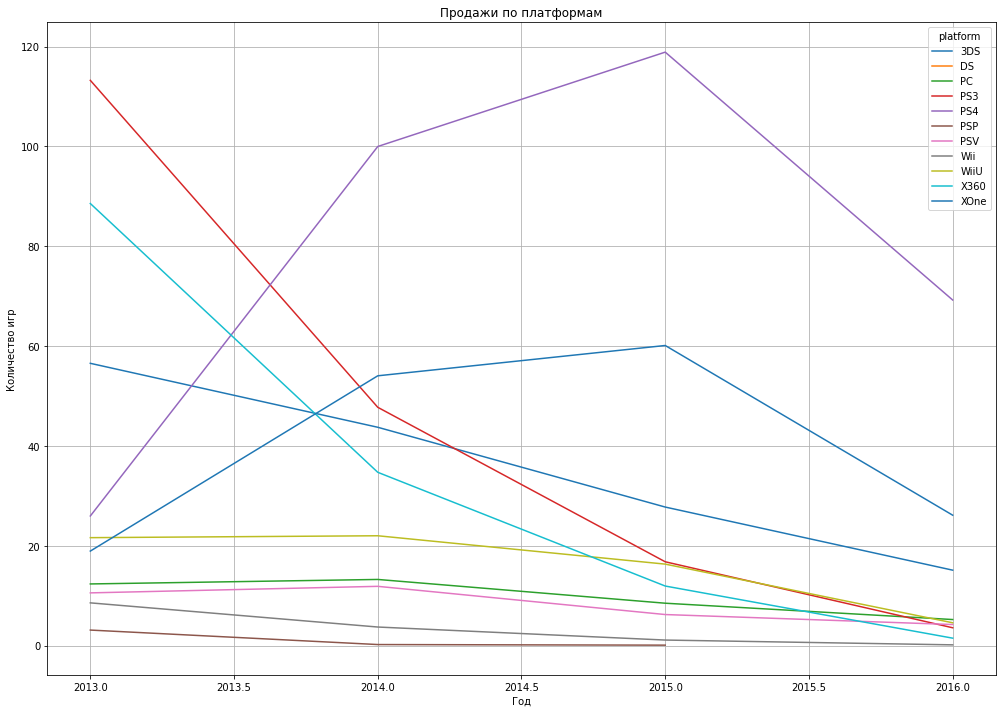

In [29]:
top_of_platform.plot(title='Продажи по платформам', figsize=(17, 12), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')

На 2016 год лидерами по продажам игр являются - PS4, Xbox One и Nintendo 3DS. Продажи по всем платформам падают.


<AxesSubplot:xlabel='sum_of_sales', ylabel='platform'>

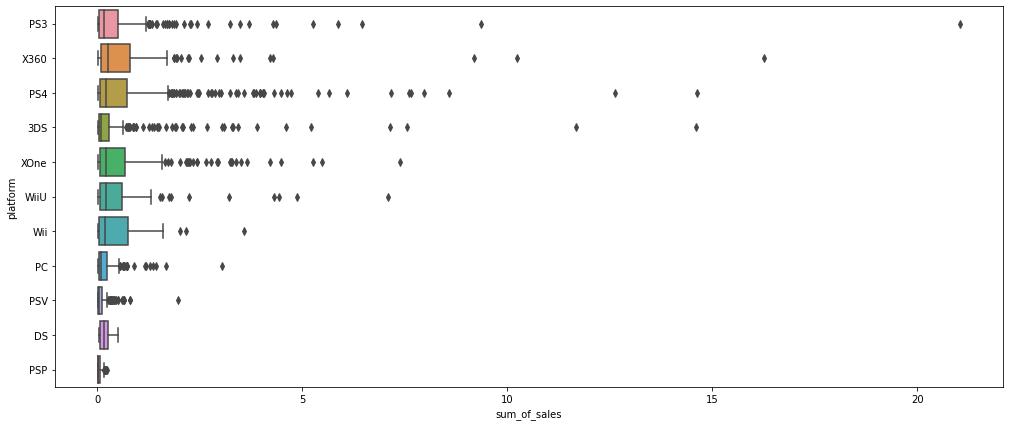

In [30]:
plt.figure(figsize=(17, 7))
sns.boxplot(data=new_df, x = 'sum_of_sales', y = 'platform')

(0.0, 1.0)

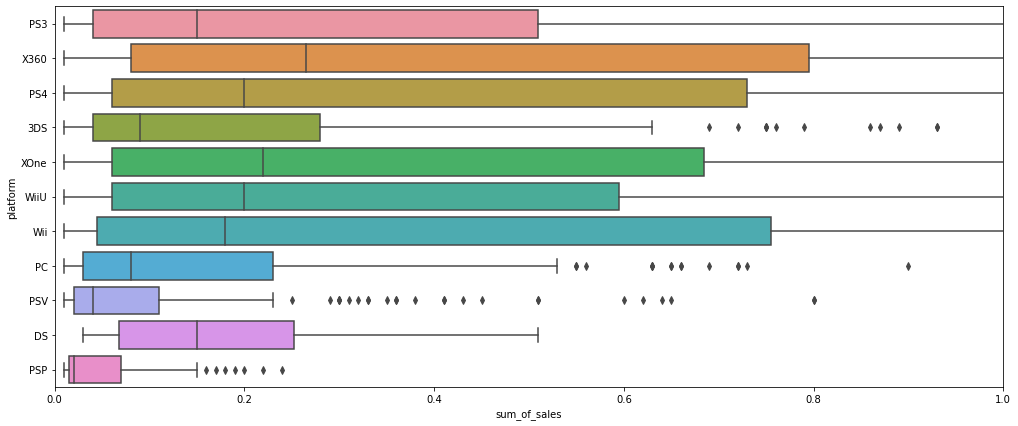

In [31]:
plt.figure(figsize=(17, 7))
sns.boxplot(data=new_df, x = 'sum_of_sales', y = 'platform')
plt.xlim(0, 1)

Самыми поуплярными платформами являются: Xbox360, PS4, Nintendo Wii U. Присутствуют выбросы, они обусловлены очень популярными играми. 

 Смотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [32]:
#new_df.query('platform=="PS4"').plot(x='sum_of_sales', y='critic_score', kind='scatter')

In [33]:
#new_df.query('platform=="PS4"')['sum_of_sales'].corr(new_df.query('platform=="PS4"')['critic_score'])

In [34]:
#new_df.query('platform=="PS4"').plot(x='sum_of_sales', y='user_score', kind='scatter')

In [35]:
#new_df.query('platform=="PS4"')['sum_of_sales'].corr(new_df.query('platform=="PS4"')['user_score'])

In [36]:
#new_df.query('platform=="Wii"').plot(x='sum_of_sales', y='critic_score', kind='scatter')

In [37]:
#new_df.query('platform=="Wii"')['sum_of_sales'].corr(new_df.query('platform=="Wii"')['critic_score'])

In [38]:
#new_df.query('platform=="Wii"').plot(x='sum_of_sales', y='user_score', kind='scatter')

In [39]:
#new_df.query('platform=="Wii"')['sum_of_sales'].corr(new_df.query('platform=="Wii"')['user_score'])

In [40]:
#new_df.query('platform=="X360"').plot(x='sum_of_sales', y='critic_score', kind='scatter')

In [41]:
#new_df.query('platform=="X360"')['sum_of_sales'].corr(new_df.query('platform=="X360"')['critic_score'])

In [42]:
#new_df.query('platform=="X360"').plot(x='sum_of_sales', y='user_score', kind='scatter')

In [43]:
#new_df.query('platform=="X360"')['sum_of_sales'].corr(new_df.query('platform=="X360"')['user_score'])

Как влияют на продажи игр X360 отзывы критиков.
AxesSubplot(0.125,0.125;0.775x0.755)
0.3503445460228664
Как влияют на продажи игр X360 отзывы пользователей.
AxesSubplot(0.125,0.125;0.775x0.755)
-0.011742185147181342


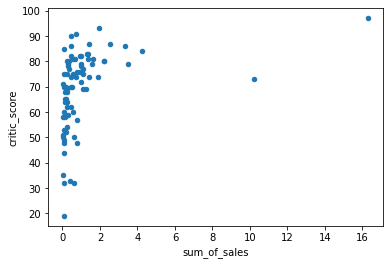

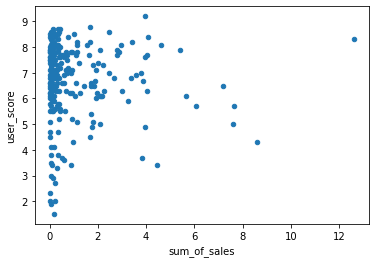

Как влияют на продажи игр PS4 отзывы критиков.
AxesSubplot(0.125,0.125;0.775x0.755)
0.406567902061781
Как влияют на продажи игр PS4 отзывы пользователей.
AxesSubplot(0.125,0.125;0.775x0.755)
-0.031957110204556376


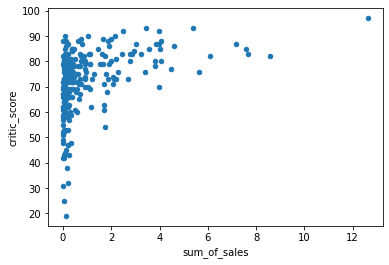

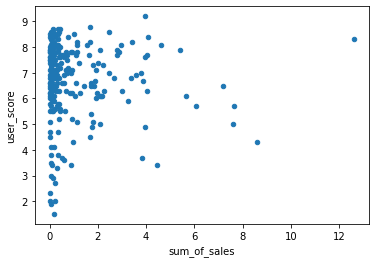

Как влияют на продажи игр XOne отзывы критиков.
AxesSubplot(0.125,0.125;0.775x0.755)
0.41699832800840175
Как влияют на продажи игр XOne отзывы пользователей.
AxesSubplot(0.125,0.125;0.775x0.755)
-0.06892505328279412


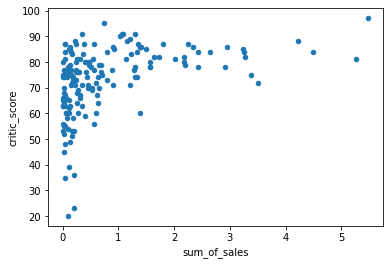

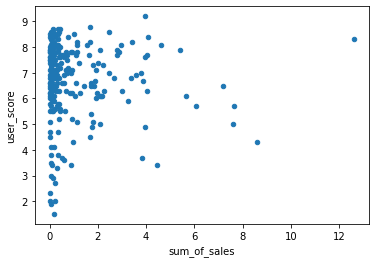

Как влияют на продажи игр PS3 отзывы критиков.
AxesSubplot(0.125,0.125;0.775x0.755)
0.3342853393371919
Как влияют на продажи игр PS3 отзывы пользователей.
AxesSubplot(0.125,0.125;0.775x0.755)
0.0023944027357566925


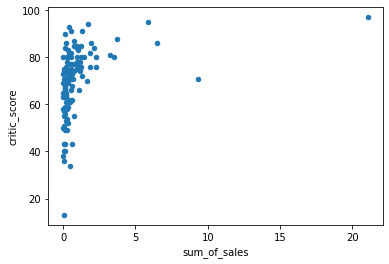

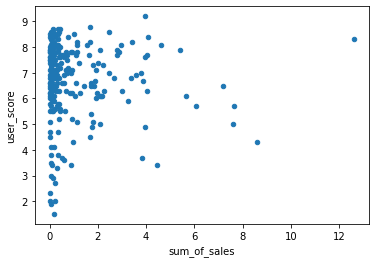

In [44]:
list1 = ['X360', 'PS4', 'XOne', 'PS3']
for col in list1:
    print(f'Как влияют на продажи игр {col} отзывы критиков.')
    print(new_df.query("platform==@col").plot(x='sum_of_sales', y='critic_score', kind='scatter'))
    print(new_df.query('platform==@col')['sum_of_sales'].corr(new_df.query('platform==@col')['critic_score']))
    print(f'Как влияют на продажи игр {col} отзывы пользователей.')
    print(new_df.query('platform=="PS4"').plot(x='sum_of_sales', y='user_score', kind='scatter'))
    print(new_df.query('platform==@col')['sum_of_sales'].corr(new_df.query('platform==@col')['user_score']))
    plt.show()

*Вывод: оценки критиков слабо влияют на продажу игр по платформам, так как их оценки более объективные. А оценки пользователей вообще не влияют на продажу, так как, я считаю, что у всех пользователей разные мнения и оценки субъективные.*

Посмотрим общее распределение игр по жанрам

<AxesSubplot:xlabel='sum_of_sales', ylabel='genre'>

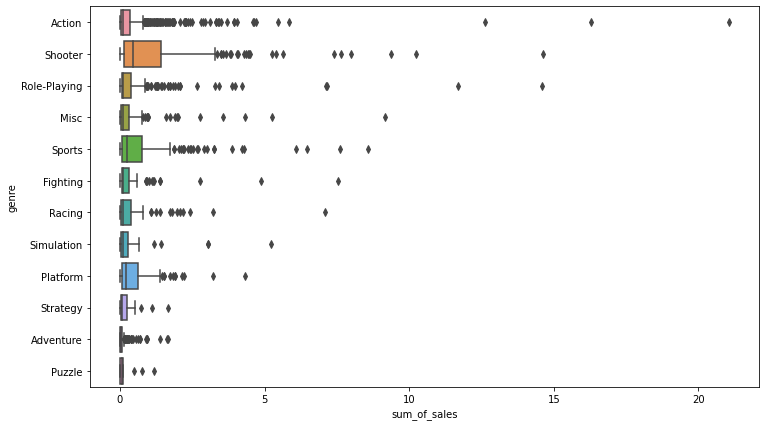

In [45]:
plt.figure(figsize=(12, 7))
#sns.barplot(data=new_df, x = 'sum_of_sales', y = 'genre')
sns.boxplot(data=new_df, x = 'sum_of_sales', y = 'genre')

*Вывод: самым популярным жанром является шутер. Меньше всего игр по жанрам: приключения, пазлы и стратегии. Но хочется отметить, что везде присутствуют выбросы, особенно в жанрах спорт и платформер.*

### Портрет пользователя каждого региона

Самые популярные платформы (топ-5) в Северной Америке.

In [46]:
new_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


В Северной Америке наблюдается такой топ-5 платформ: Xbox360, PS3, Nintendo Wii, Nintendo DS и PS4.

Самые популярные платформы (топ-5) в Европе.

In [47]:
new_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


В Европе наблюдается такой топ-5 платформ: PS3, Xbox360, PS4, Nintendo Wii и PC.

Самые популярные платформы (топ-5) в Японии.

In [48]:
new_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


В Японии наблюдается такой топ-5 платформ: Nintendo 3DS, PS3, Nintendo DS, PSP и Nintendo Wii.

Самые популярные жанры (топ-5) в Северной Америке.

([<matplotlib.patches.Wedge at 0x7fda57b9f220>,
 [Text(0.6797106326218408, 0.864866149124139, 'Action'),
  Text(-0.9408995416112679, 0.5698316002080844, 'Shooter'),
  Text(-0.8330777408948545, -0.7183185070882734, 'Sports'),
  Text(-0.06348089428758455, -1.0981667341804016, 'Role-Playing'),
  Text(0.5007147831724511, -0.9794308071081722, 'Misc'),
  Text(0.789163274560499, -0.7663036774575408, 'Platform'),
  Text(0.9496997708595467, -0.5550408500545925, 'Fighting'),
  Text(1.042671038154375, -0.35048124941867886, 'Racing'),
  Text(1.0822264768126455, -0.19694124221627235, 'Adventure'),
  Text(1.0951561595415198, -0.10311637221251369, 'Simulation'),
  Text(1.0993086338349938, -0.03899394280961516, 'Strategy'),
  Text(1.0999804788393288, -0.006553332923126906, 'Puzzle')],
 [Text(0.3707512541573677, 0.4717451722495303, '29%'),
  Text(-0.5132179317879643, 0.31081723647713694, '25%'),
  Text(-0.4544060404881024, -0.3918100947754218, '15%'),
  Text(-0.03462594233868248, -0.5990000368256735, '

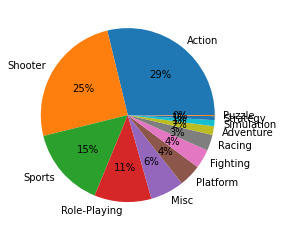

In [49]:
ab = new_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
plt.pie(ab['na_sales'], labels=ab.index, autopct='%.0f%%')

В Северной Америке самыми популярными жанрами являются: экшен, шутер, спорт, аркада и ролевая игра.

Самые популярные жанры (топ-5) в Европе.

([<matplotlib.patches.Wedge at 0x7fda57b95d30>,
 [Text(0.6432734453277142, 0.8922999913348718, 'Action'),
  Text(-0.9403367321975017, 0.5707598707688936, 'Shooter'),
  Text(-0.8803780373120612, -0.6594956492794801, 'Sports'),
  Text(-0.16113505161472874, -1.0881339509183228, 'Role-Playing'),
  Text(0.33641448294160425, -1.0472942736724635, 'Racing'),
  Text(0.6507551003178982, -0.886858387461179, 'Misc'),
  Text(0.874052497527357, -0.6678564453280283, 'Platform'),
  Text(0.9951305015411696, -0.4687379704082233, 'Simulation'),
  Text(1.0558566190483678, -0.3084911668293759, 'Fighting'),
  Text(1.0876976937081455, -0.16405403714014918, 'Adventure'),
  Text(1.0986352074679937, -0.054778471243351605, 'Strategy'),
  Text(1.099964718531248, -0.008810107063634175, 'Puzzle')],
 [Text(0.35087642472420777, 0.4867090861826573, '30%'),
  Text(-0.5129109448350009, 0.31132356587394194, '22%'),
  Text(-0.48020620217021515, -0.3597248996069891, '15%'),
  Text(-0.08789184633530657, -0.5935276095918124,

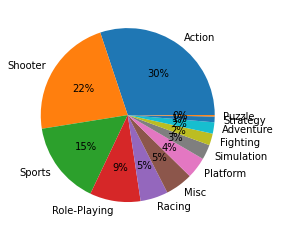

In [50]:
ab = new_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
plt.pie(ab['eu_sales'], labels=ab.index, autopct='%.0f%%')

В Европе точно такие же популярные жанры, как и в Северной Америке.

Самые популярные жанры (топ-5) в Японии.

([<matplotlib.patches.Wedge at 0x7fda5623e820>,
 [Text(0.46036404947847065, 0.9990320024642776, 'Role-Playing'),
  Text(-1.0991225303238712, -0.043927933418847924, 'Action'),
  Text(-0.4505324600234556, -1.0035041118327386, 'Misc'),
  Text(-0.05054914085225468, -1.0988379245180333, 'Fighting'),
  Text(0.29578997727485, -1.059484916996813, 'Shooter'),
  Text(0.5746125927120485, -0.9379874030586646, 'Adventure'),
  Text(0.7892742940293831, -0.7661893295944672, 'Sports'),
  Text(0.9418134725178458, -0.5683197893649995, 'Platform'),
  Text(1.038786100996626, -0.3618334373385464, 'Simulation'),
  Text(1.0816348286292075, -0.2001651755332709, 'Racing'),
  Text(1.0953315669919783, -0.10123615140303205, 'Strategy'),
  Text(1.0996186600610507, -0.028962086346458263, 'Puzzle')],
 [Text(0.25110766335189305, 0.5449265467986968, '36%'),
  Text(-0.599521380176657, -0.023960690955735227, '29%'),
  Text(-0.2457449781946121, -0.5473658791814937, '7%'),
  Text(-0.027572258646684368, -0.5993661406461999,

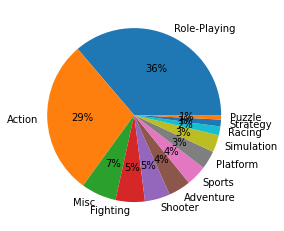

In [51]:
ab = new_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
plt.pie(ab['jp_sales'], labels=ab.index, autopct='%.0f%%')

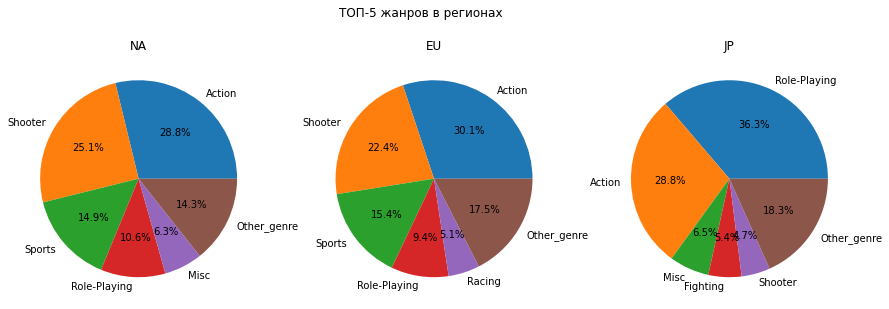

In [67]:
tmp = new_df.copy()
region = tmp.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(len(region)):
  # выберем 5 самых продающих жанров
  df_i = (tmp.groupby('genre')[region[i]].sum().reset_index().
          sort_values(region[i], ascending = False, ignore_index = True)[:5])
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', region[i]: tmp[region[i]].sum() - df_i[region[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[region[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Японии же популярными жанрами являются: ролевые игры, экшен, аркады, спорт и платформеры.

Как влияет рейтинг ESRB на продажи в отдельном регионе:

In [52]:
new_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


В Северной Америке самые популярные игры с рейтингом M (материалы игры не подходят для лиц младше 17 лет), а также с рейтингом E (содержание вполне подходит для всех возрастов) и игры без рейтинга.

In [53]:
new_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


В Европе самые популярные игры с таким же игровым рейтингом, как и в Северной Америке.

In [54]:
new_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


В Японии популярны игры без рейтинга и с рейтингом Е (содержание вполне подходит для всех возрастов), а также Т (игра подходит для лиц от 13 лет).

In [55]:
# Комментарий ревьюера
temp = new_df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    977
M          369
T          333
E          302
E10+       252
Name: rating, dtype: int64

###  Проверка гипотез

Далее предлагаю проверить гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

Принципы формирования нулевой и альтернативной гипотез: Н0 - гипотеза, при которой средние генеральных совокупностей равны.
Н1 - противоречащее Н0 выражение "средние не равны".

In [56]:
x = new_df.query('platform== "XOne"')
var1 = np.var(x['user_score'])
var1

1.8965188383045526

In [57]:
y = new_df.query('platform== "PC"')
var2 = np.var(y['user_score'])
var2

3.01630634755463

Из вышеперечисленных расчетов, можно сказать, что дисперсии двух генеральных совокупнстей не равны. И так как объемы выборок не равны, есть основания для того, что бы поставить параметр **equal_var=False**.

In [58]:
x1 = x['user_score']
x1 = x1.dropna()

y1 = y['user_score']
y1 = y1.dropna()

alpha = 0.05 #уровень статистической значимости если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(x1, y1, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [59]:
x1.sum() / len(x1)

6.521428571428572

In [60]:
y1.sum() / len(y1)

6.2696774193548395

*Можно сделать вывод, что на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть
нулевую гипотезу в пользу альтернативы. И можно увидеть, что средние оценки примерно равны.*

 Теперь посмотрим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средний пользовательский рейтингй жанра Action больше, чем Sports.

Принципы формирования нулевой и альтернативной гипотез: Н0 - гипотеза, при которой средние генеральных совокупностей равны. Н1 - противоречащая гипотеза "среднее Acrtion больше, чем Sports".

In [61]:
a = new_df.query('genre == "Action"')
a1 = a['user_score']
var1 = np.var(a1)
var1

1.7648124186332366

In [62]:
b = new_df.query('genre == "Sports"')
b1 = b['user_score']
var2 = np.var(b1)
var2

3.160733984375

Из вышеперечисленных расчетов, можно сказать, что дисперсии двух генеральных совокупнстей не равны. И так как объемы выборок не равны, есть основания для того, что бы поставить параметр **equal_var=False**.

In [63]:
a1 = a1.dropna()

b1 = b1.dropna()

alpha = 0.01 #уровень статистической значимости если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(a1, b1, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [64]:
a1.sum() / len(a1)

6.837532133676092

In [65]:
b1.sum() / len(b1)

5.238124999999999

*Из расчетов делаем вывод, что на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть
нулевую гипотезу в пользу альтернативы. Отличие в средних более, чем на 1.5 пункта.*

T-критерий я применил к выборкам, потому что выборки независимые и в них находятся количественные переменые.

### Вывод

Чтобы сделать прогноз на 2017 год, я взял данные с 2008 года, потому что именно с этого года начинается тенденция спада количества проданных игр. Этот спад обусловлен тем, что компании по выпуску игр снижают количество засчет повышения качества игр.

**В период с 2008 года были определеные следющие параметры:**

*1)**Самыми популярными платформами** являются: Xbox360, PS4, XboxOne, PS3. Все платформы падают по продажам игр.*

*2)**Оценки критиков слегка влияют на продажу игр** по платформам, так как их оценки более объективные. А **оценки пользователей вообще не влияют на продажу**, так как, я считаю, что у всех пользователей разные мнения и оценки субъективные.*

*3)**Самым популярным жанром является шутер**. Меньше всего игр по жанрам: приключения, пазлы и стратегии. Но хочется отметить, что везде присутствуют выбросы, особенно в жанрах спорт и платформер.*

*4)Для жителей **Европы и Северной Америки** популярными платформами являются **PS3** и **Xbox 360**. Для жителей **Японии** также **PS3**, но и **Nintendo 3DS**.*

*5)Для **всех регионов популярен жанр шутер**, и для жителей **Европы и Северной Америки** можно выделить популярность жанров **экшен и спорт**. В **Японии** популярны жанры: **аркада и ролевая игра**.*

*6)**Влияет ли рейтинг ESRB на продажи? - Да**: для всех регионов в топ-3 входили игры с рейтингами М (материалы игры не подходят для лиц младше 17 лет), Е (содержание вполне подходит для всех возрастов), Т (игра подходит для лиц от 13 лет).*

*7)Средние пользовательские **рейтинги платформ Xbox One и PC одинаковые?**
Ответ: **нет предпоссылок, это отвергать**. Ответ дан, исходя из проверки гипотезы о равенстве средних двух генеральных совокупностей.*

*8)Средние пользовательские **рейтинги жанров Action и Sports разные?**
Ответ: **есть предпоссылки это опровергнуть**. Ответ также получен из проверки гипотезы.*


Рекомендации для рекламного отдела:

1)Стоит потратить на рекламу в Северной Америке, на платформе PS4, с жанром экшен и с рейтингом М. А также стоит немного обратить внимание на отзывы критиков.

2)Или по таким же параметрам только в Европе.